# Load required libraries

In [15]:
%config Completer.use_jedi = False

import sys
sys.path.append("../lib/") # Path of the profile_analysis_class library
from importlib import reload
import profile_analysis_class
reload(profile_analysis_class)
from profile_analysis_class import ProfileAnalysis
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('../assets/styles/plotting_style.mplstyle') # Matplotlip plotting style sheet (OPTIONAL)

pa=ProfileAnalysis('.') # Where to run the analysis

Project has been created!


/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:143: UserWarning: Folder input_data already exist...skipping
  warnings.warn("Folder input_data already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:149: UserWarning: Folder data_raw already exist...skipping
  warnings.warn("Folder data_raw already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:155: UserWarning: Folder data_clinical already exist...skipping
  warnings.warn("Folder data_clinical already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:161: UserWarning: Folder sample_by_section already exist...skipping
  warnings.warn("Folder sample_by_section already exist...skipping",
/home/ieo5417/Documenti/colon_paper/libraries/example/../lib/profile_analysis_class.py:167: UserWarning: Folder data_fitting already exist...ski

# Display analysis settings

In [16]:
pa.print_settings()

Settings file path: ./SETTINGS.ini
Defined sections: {'Cecum': ['Cecum'], 'Ascending colon': ['Ascending colon'], 'Hepatic flexure of colon': ['Hepatic flexure of colon'], 'Transverse colon': ['Transverse colon'], 'Descending colon': ['Descending colon', 'Splenic flexure of colon'], 'Sigmoid colon': ['Sigmoid colon'], 'Rectosigmoid junction': ['Rectosigmoid junction'], 'Rectum, NOS': ['Rectum, NOS']}
Section names for plotting: ['Cecum', 'Ascending colon', 'Hepatic flexure', 'Transverse colon', 'Descending colon', 'Sigmoid colon', 'Rectosigmoid junction', 'Rectum']
Section distance from reference point: [1, 2, 3, 4, 5, 6, 7, 8]
Index colon name: ensmbl_id
Maximum percentage of 0s to drop a sample: 0.3
Is random seed set?: True 
random seed: 10 
Random distribution area threshold: 0.95
Maximum polynomial degree to test: 3
Number of random permutations: 100
Type of data analysed: numeric
Input data folder: ./input_data
Raw data folder: ./input_data/raw
Clinical data folder: ./input_data/

# Assign each sample to a section and plot distribution

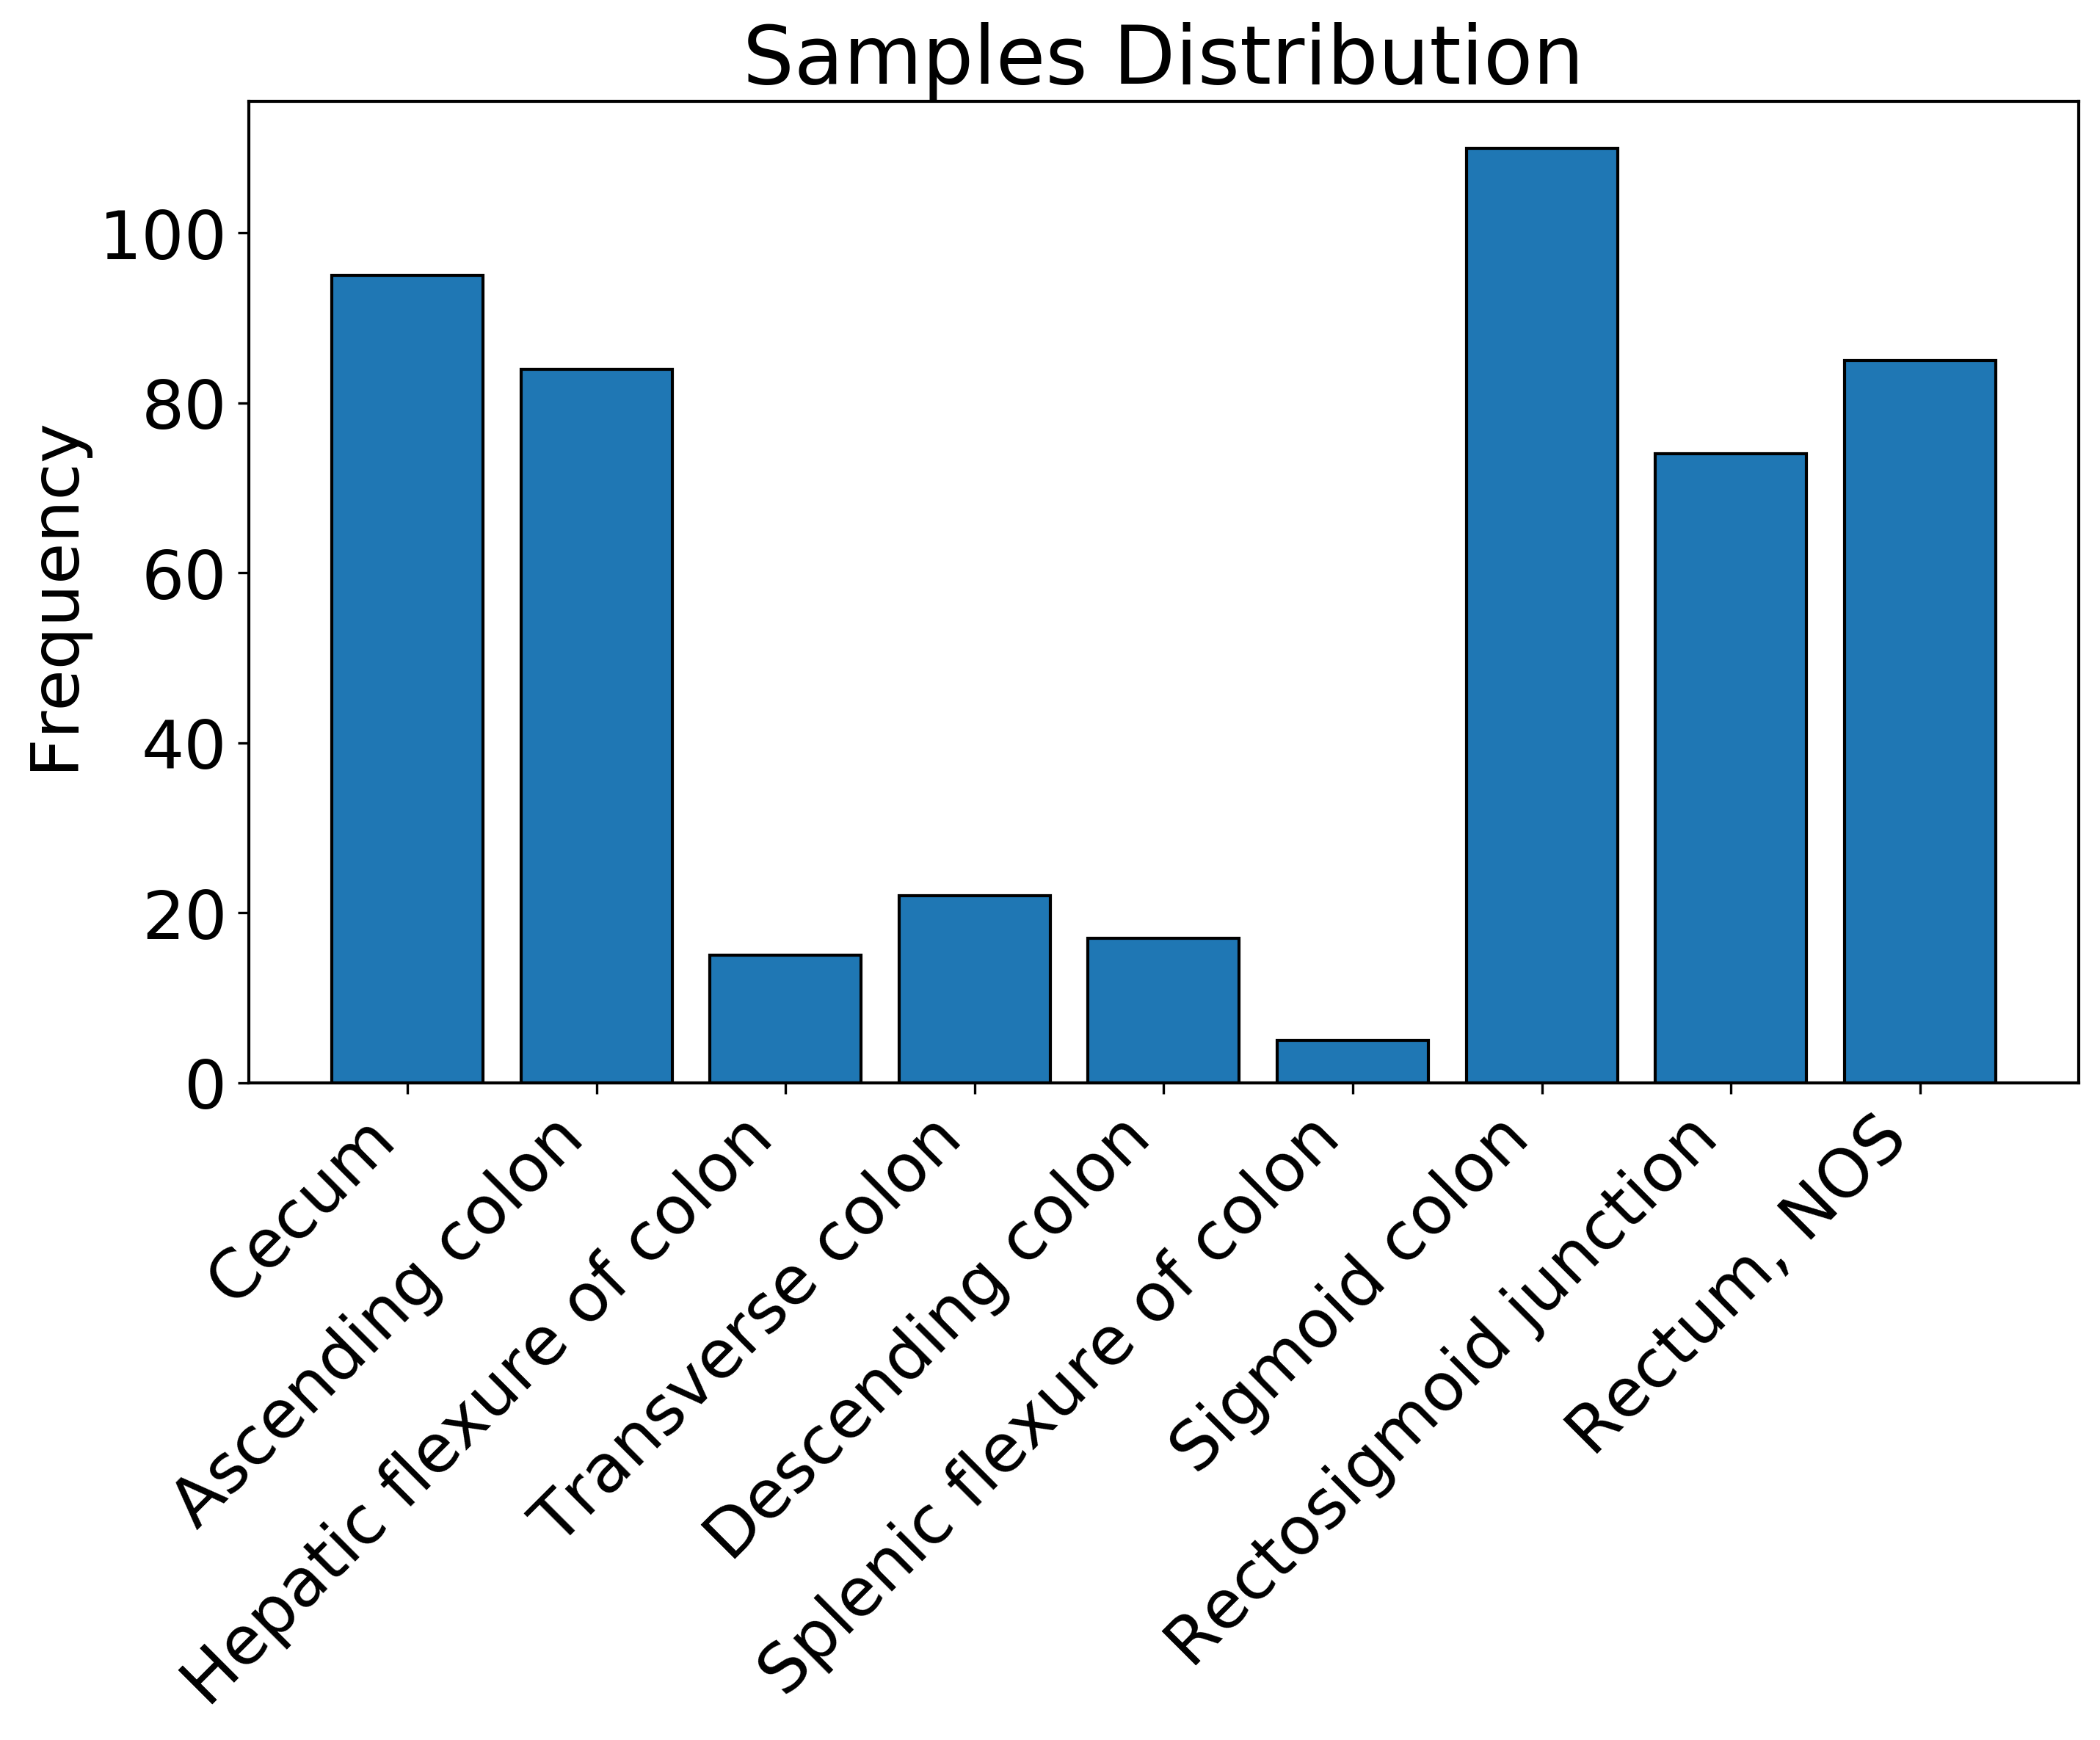

In [17]:
pa.create_samples_to_sections_table()
pa.plot_sample_distribution()

# Calculate median and median average deviation for each section

In [18]:
medians, mad=pa.median_by_section(remove_outliers=False, scale=False)
medians.head()

,Cecum,Ascending colon,Hepatic flexure of colon,Transverse colon,Descending colon,Sigmoid colon,Rectosigmoid junction,"Rectum, NOS"
ENSG00000000003,73.637831,79.629240,103.124233,75.913878,82.543993,135.094292,131.564108,100.136352
ENSG00000000005,0.992449,0.759070,1.336772,0.798797,1.680453,1.607038,1.829135,1.402538
ENSG00000000419,100.154703,105.029086,117.657759,97.626225,154.401872,173.674444,138.032651,142.622256
ENSG00000000457,6.912029,6.640371,7.004861,7.278464,7.113812,7.110153,7.174294,6.944052
ENSG00000000460,5.266616,4.969358,5.424937,4.844178,6.057782,5.917231,5.613395,6.109475


# Fitting observables with linear polynomial and sigmoid models

In [19]:
models_scores, poly_obs_fit_scores, sig_obs_fit_scores, poly_models, sig_models=pa.fit_data(medians, mad, guess_bounds = True, dog_allowed=False)

# Fitting random permutated data with linear polynomial and sigmoid models

In [20]:
poly_perm_fit_scores, sig_perm_fit_scores=pa.fit_random_data(medians, mad, guess_bounds = True, dog_allowed=True)

  0%|          | 0/200 [00:00<?, ?it/s]

done polynomial


100%|██████████| 200/200 [13:02<00:00,  3.91s/it]


# Evaluate performance of each model

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1426: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


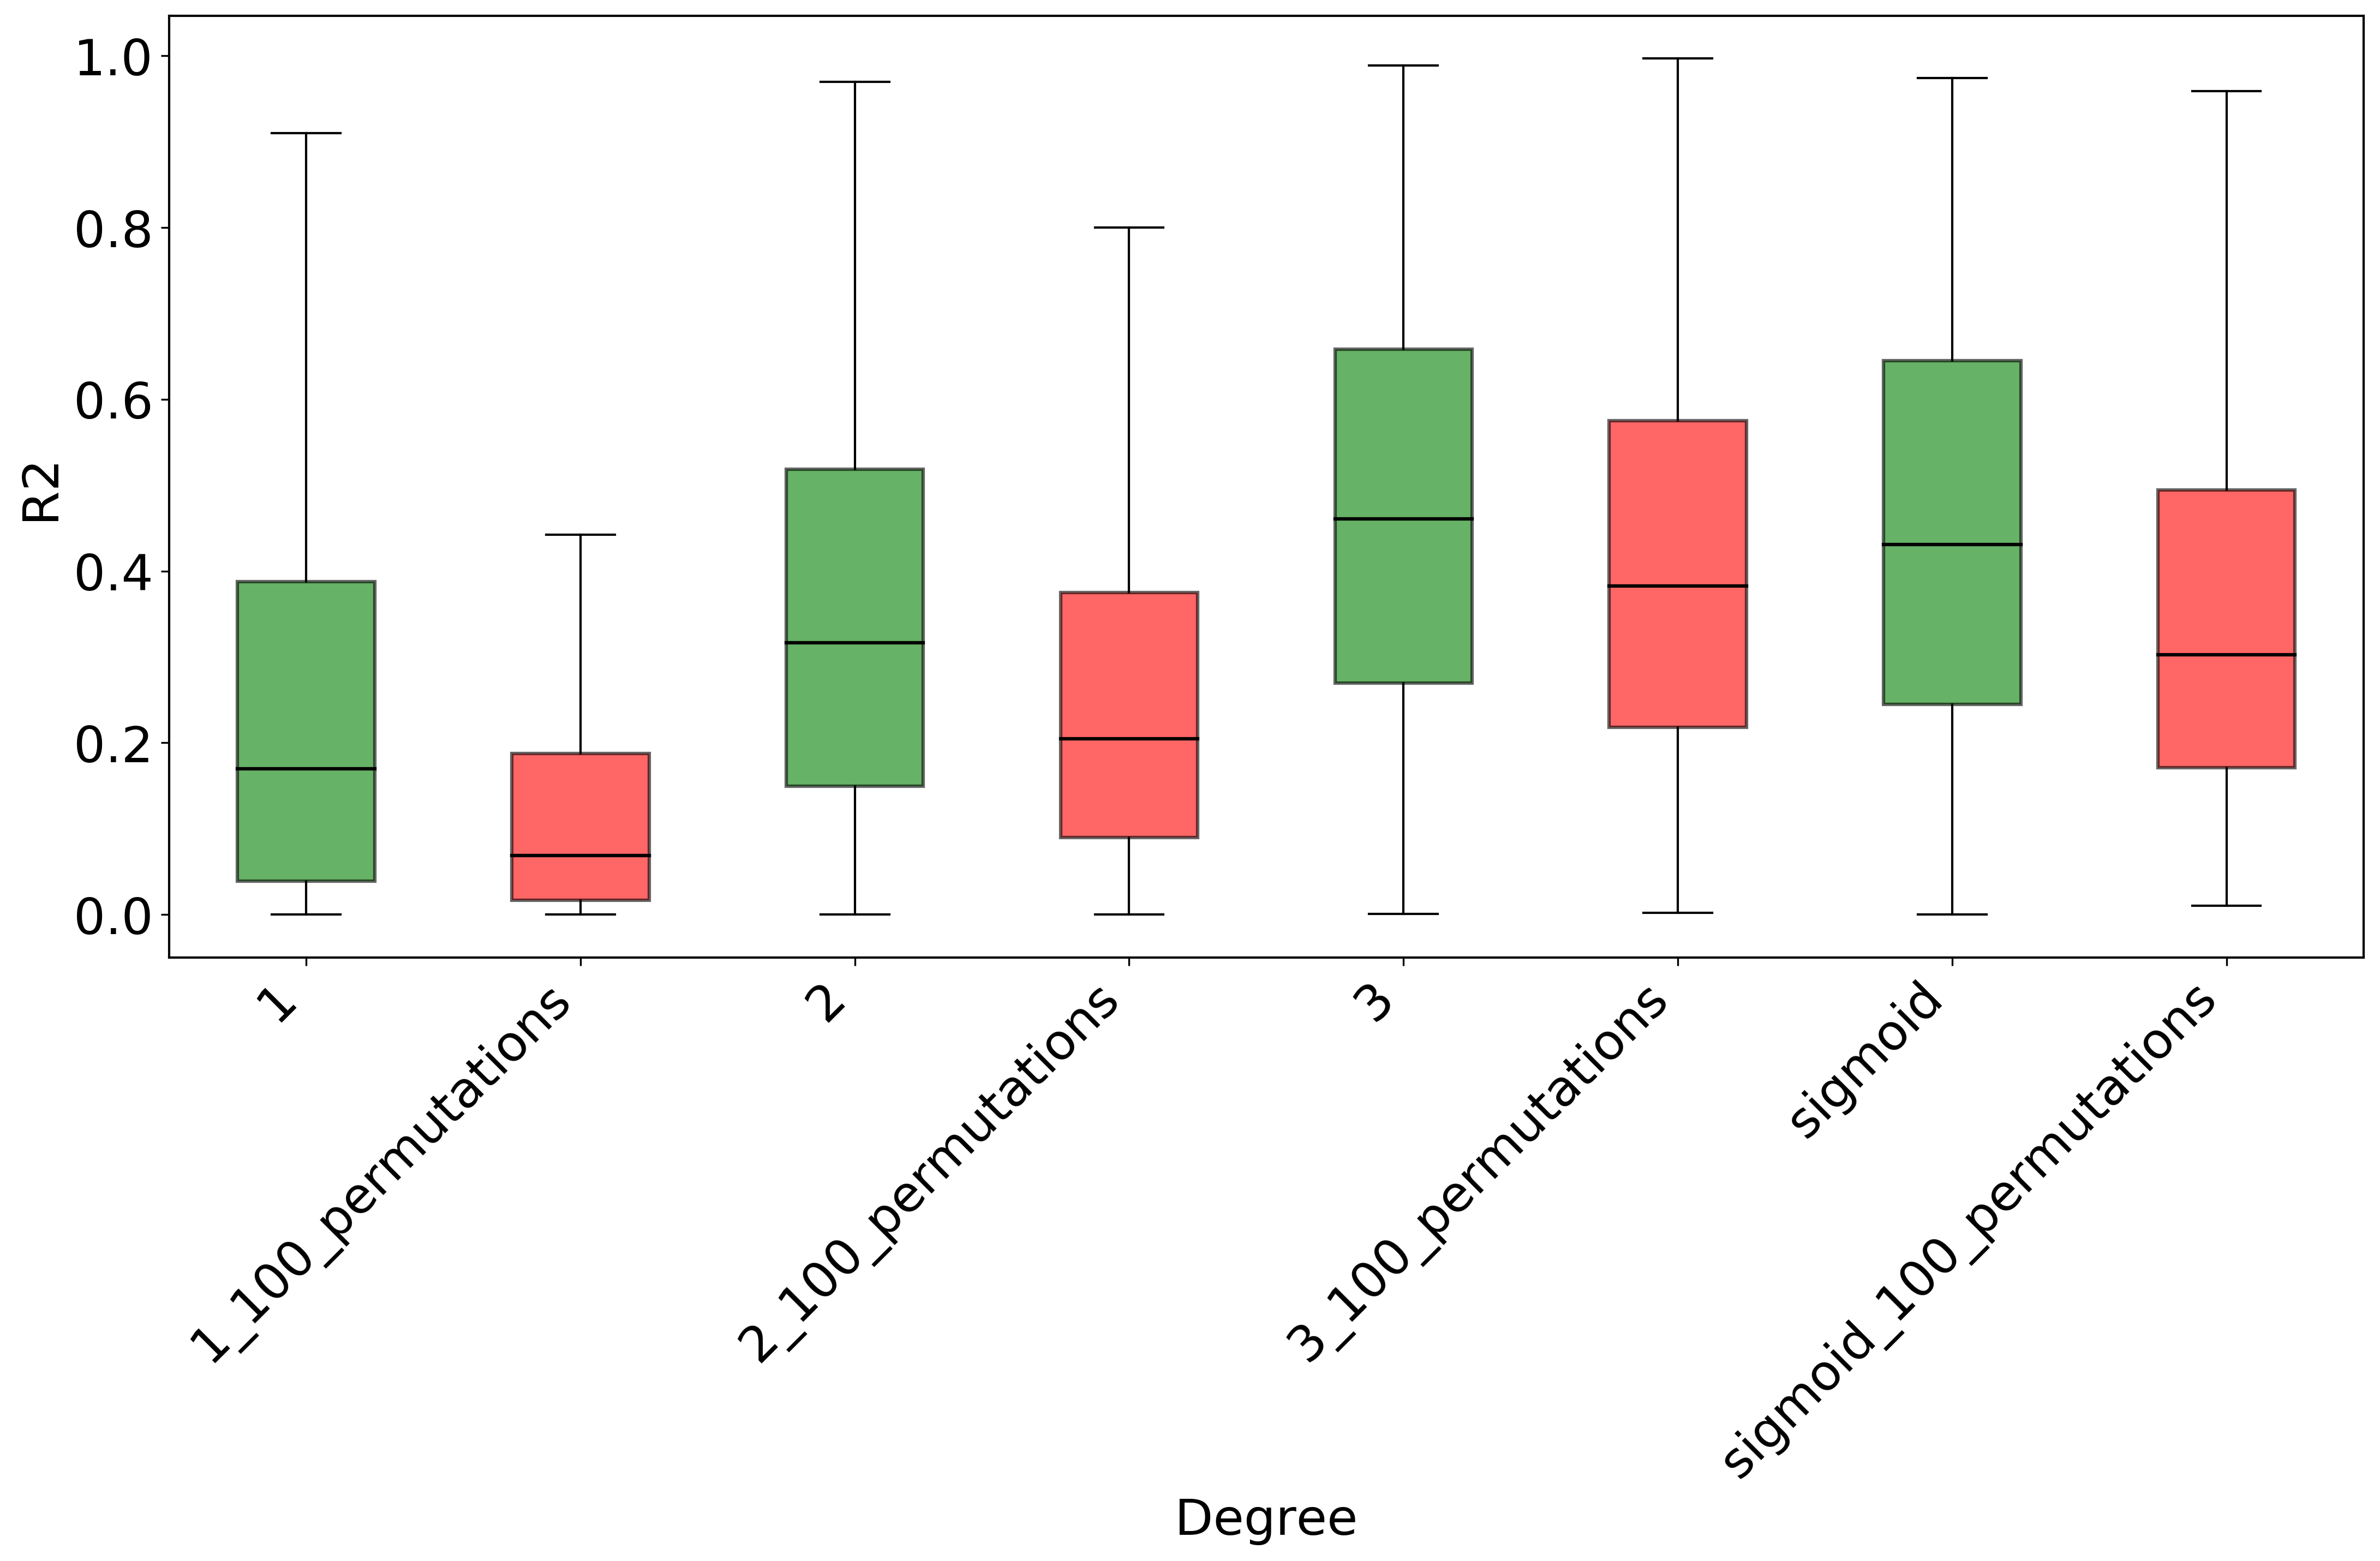

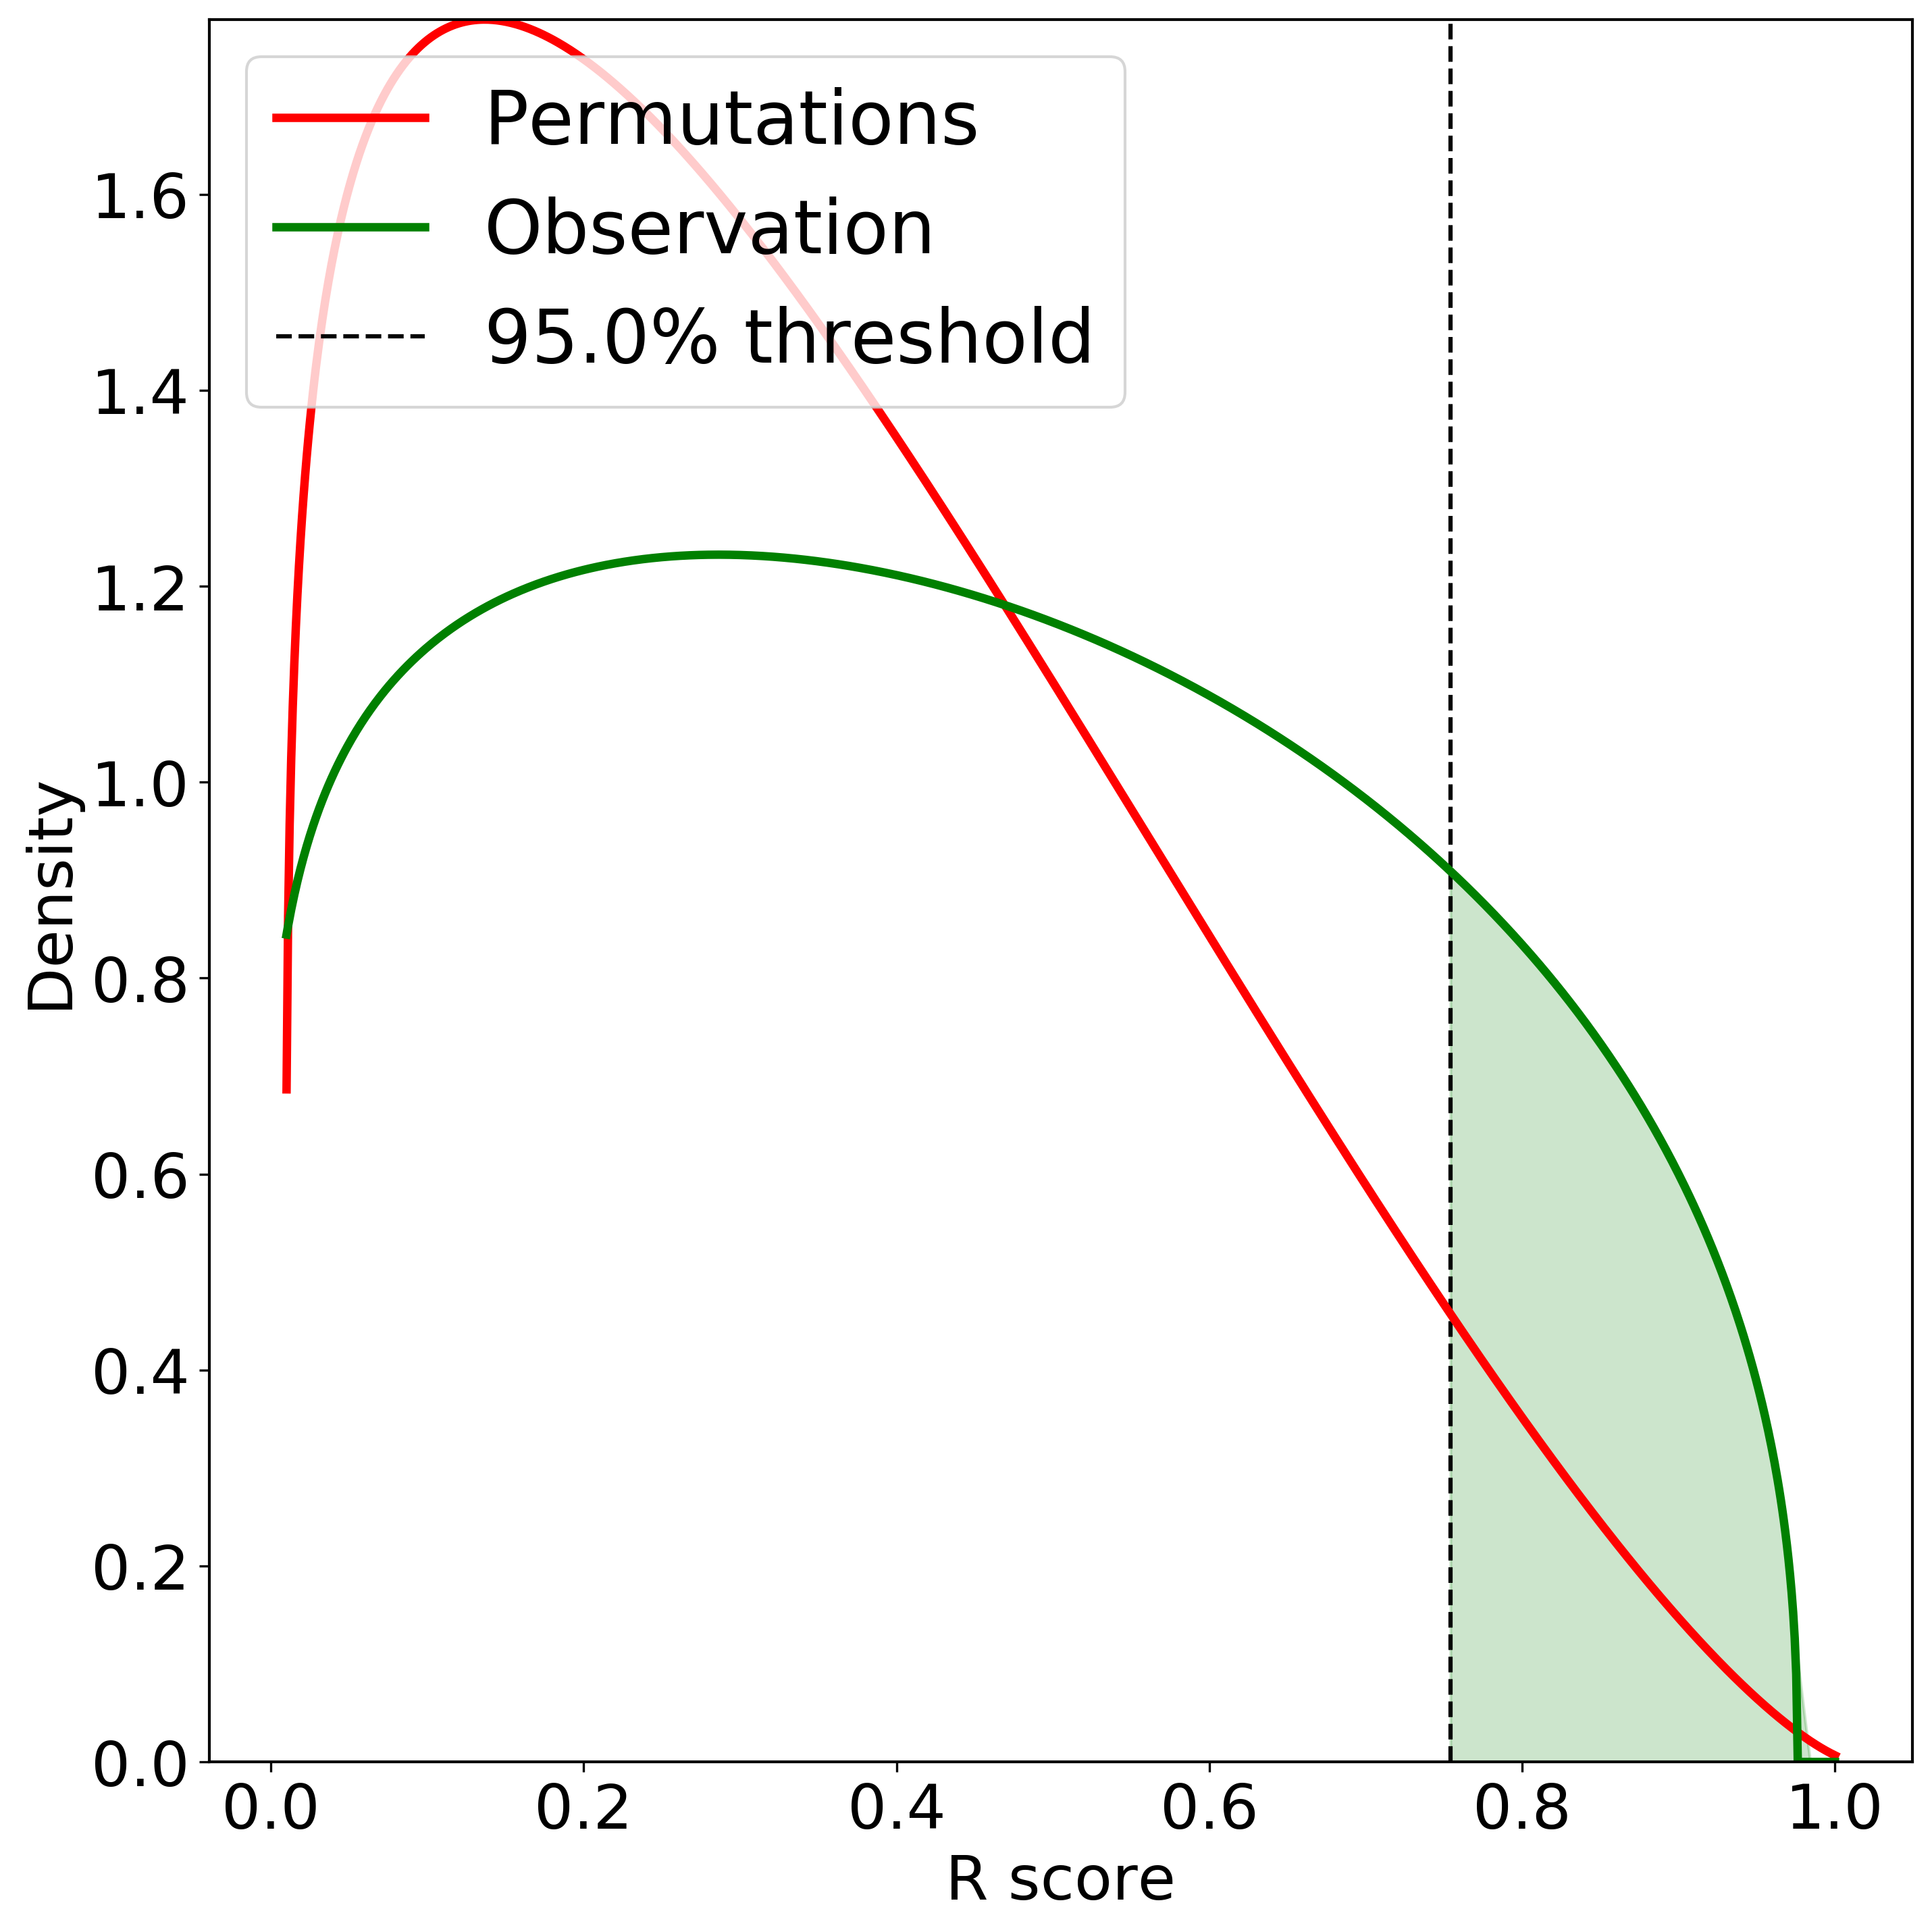

/home/ieo5417/.local/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


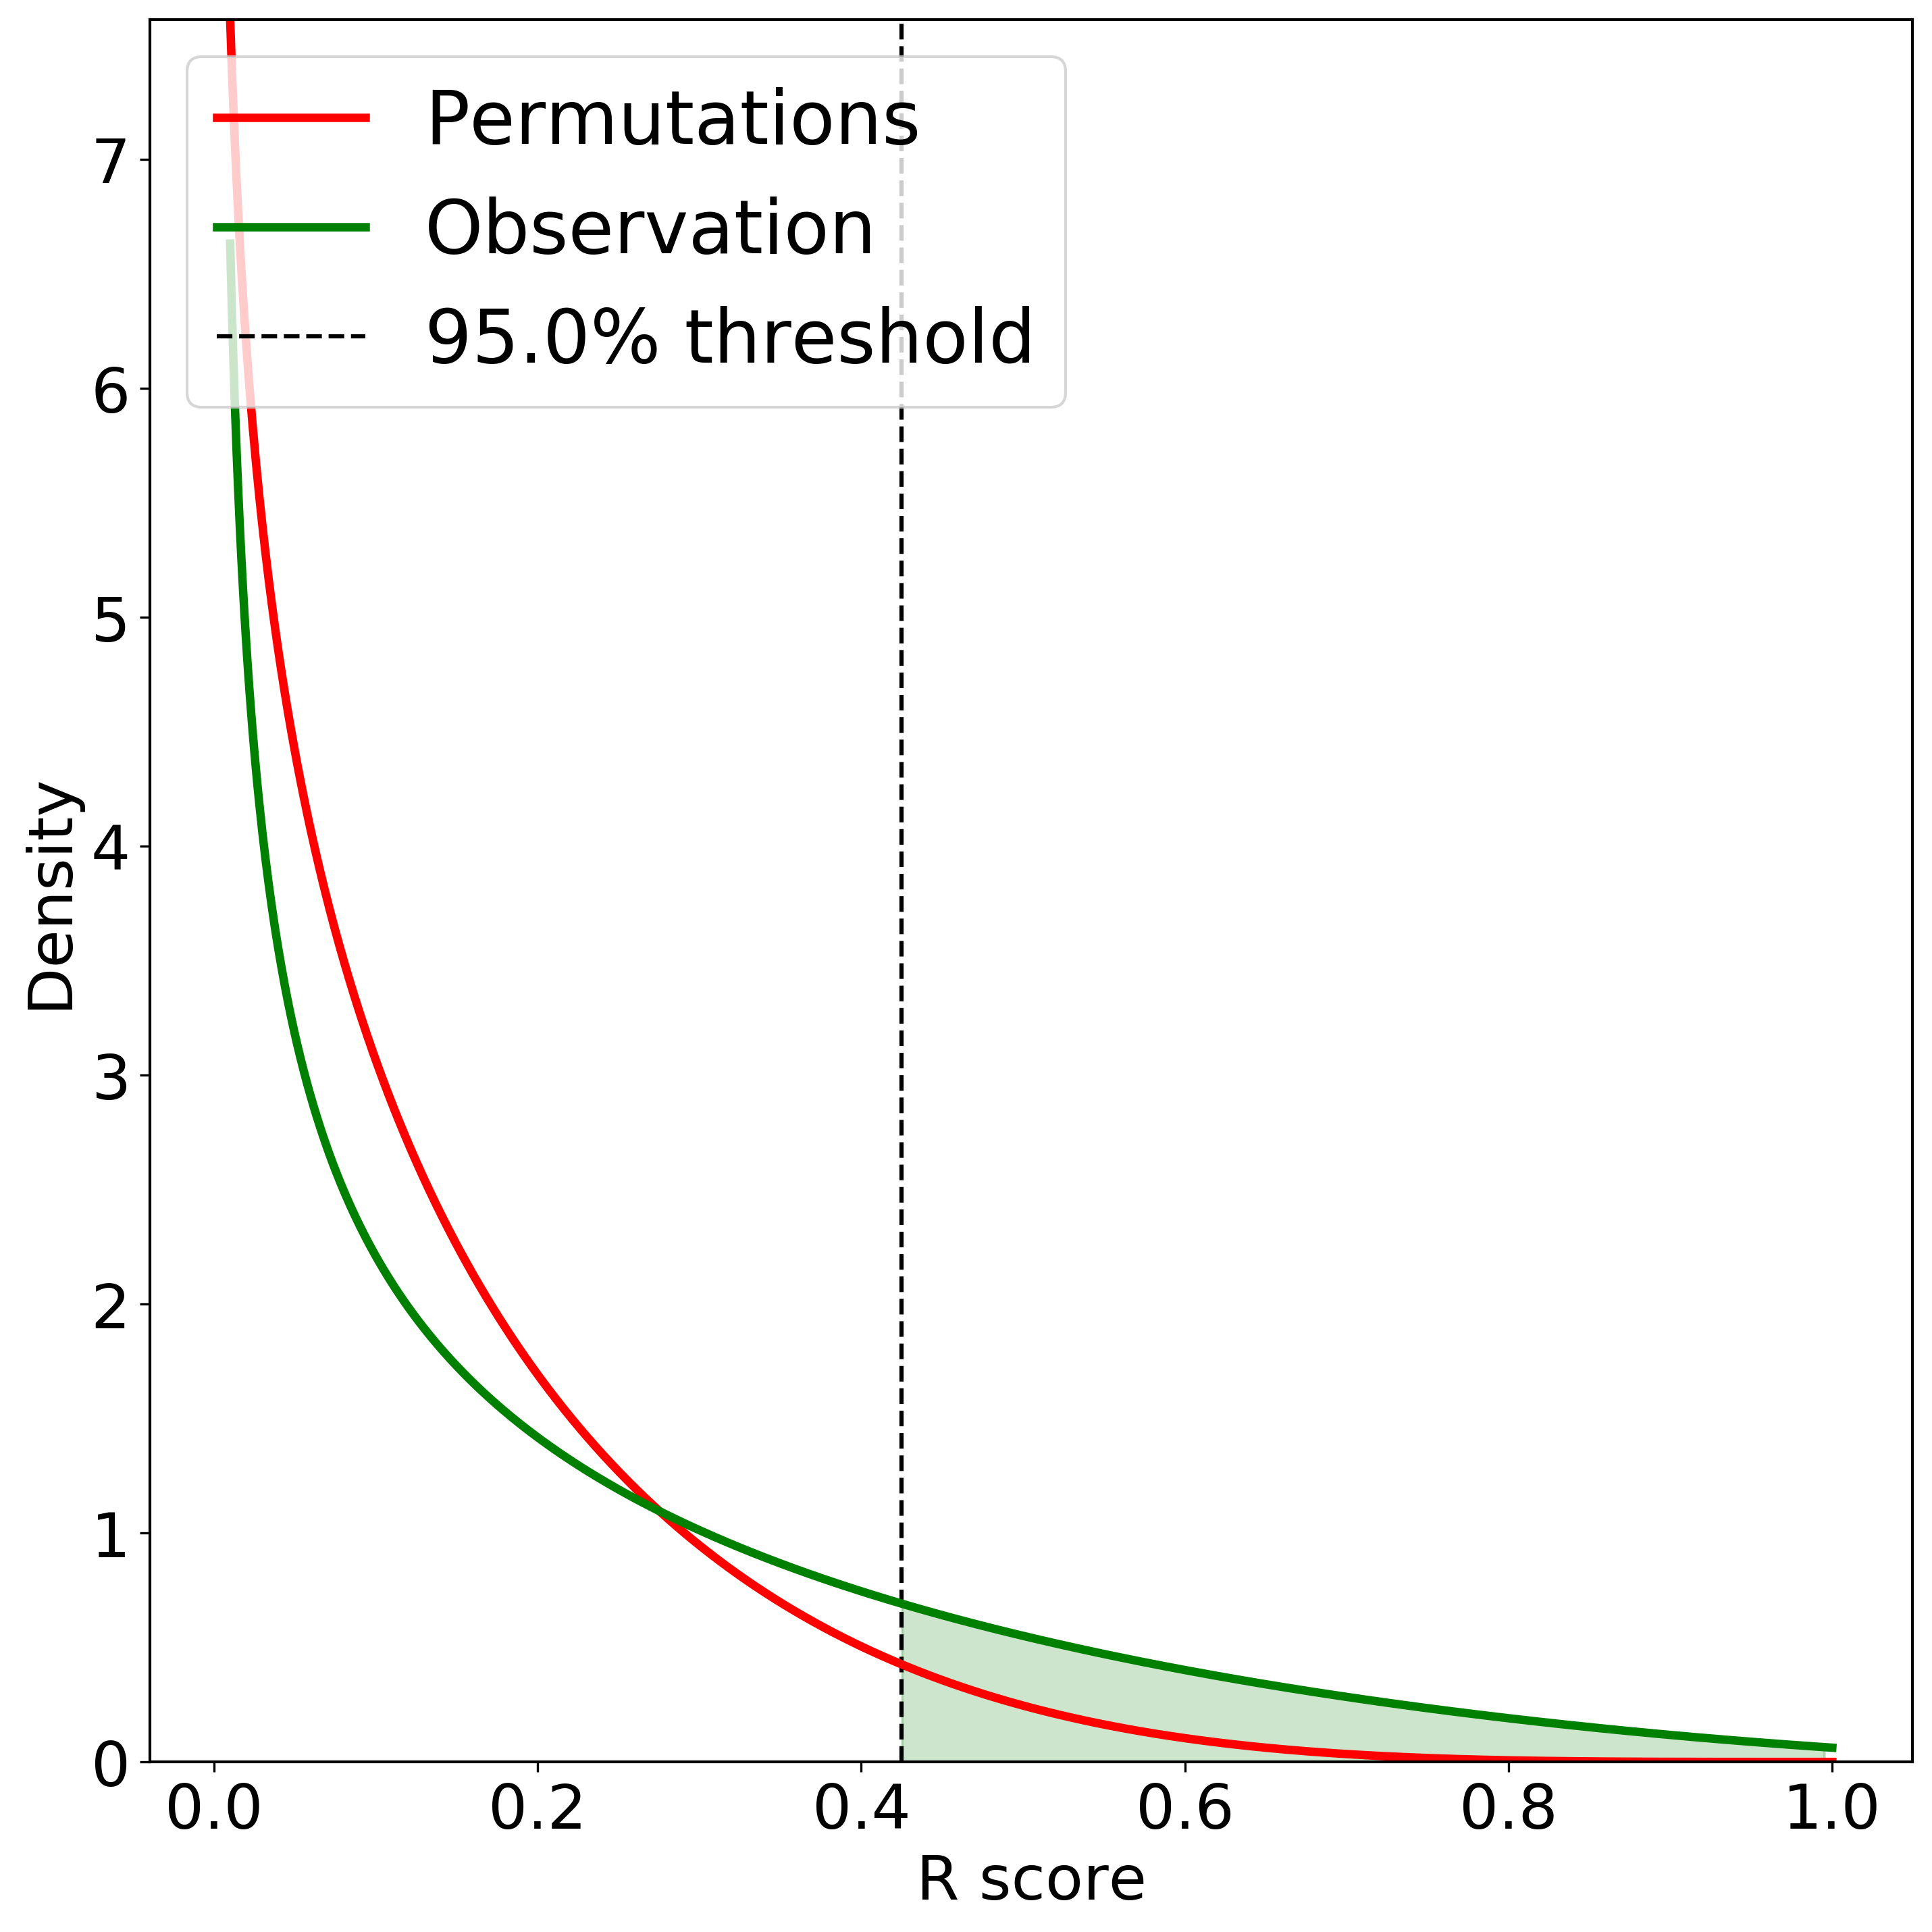

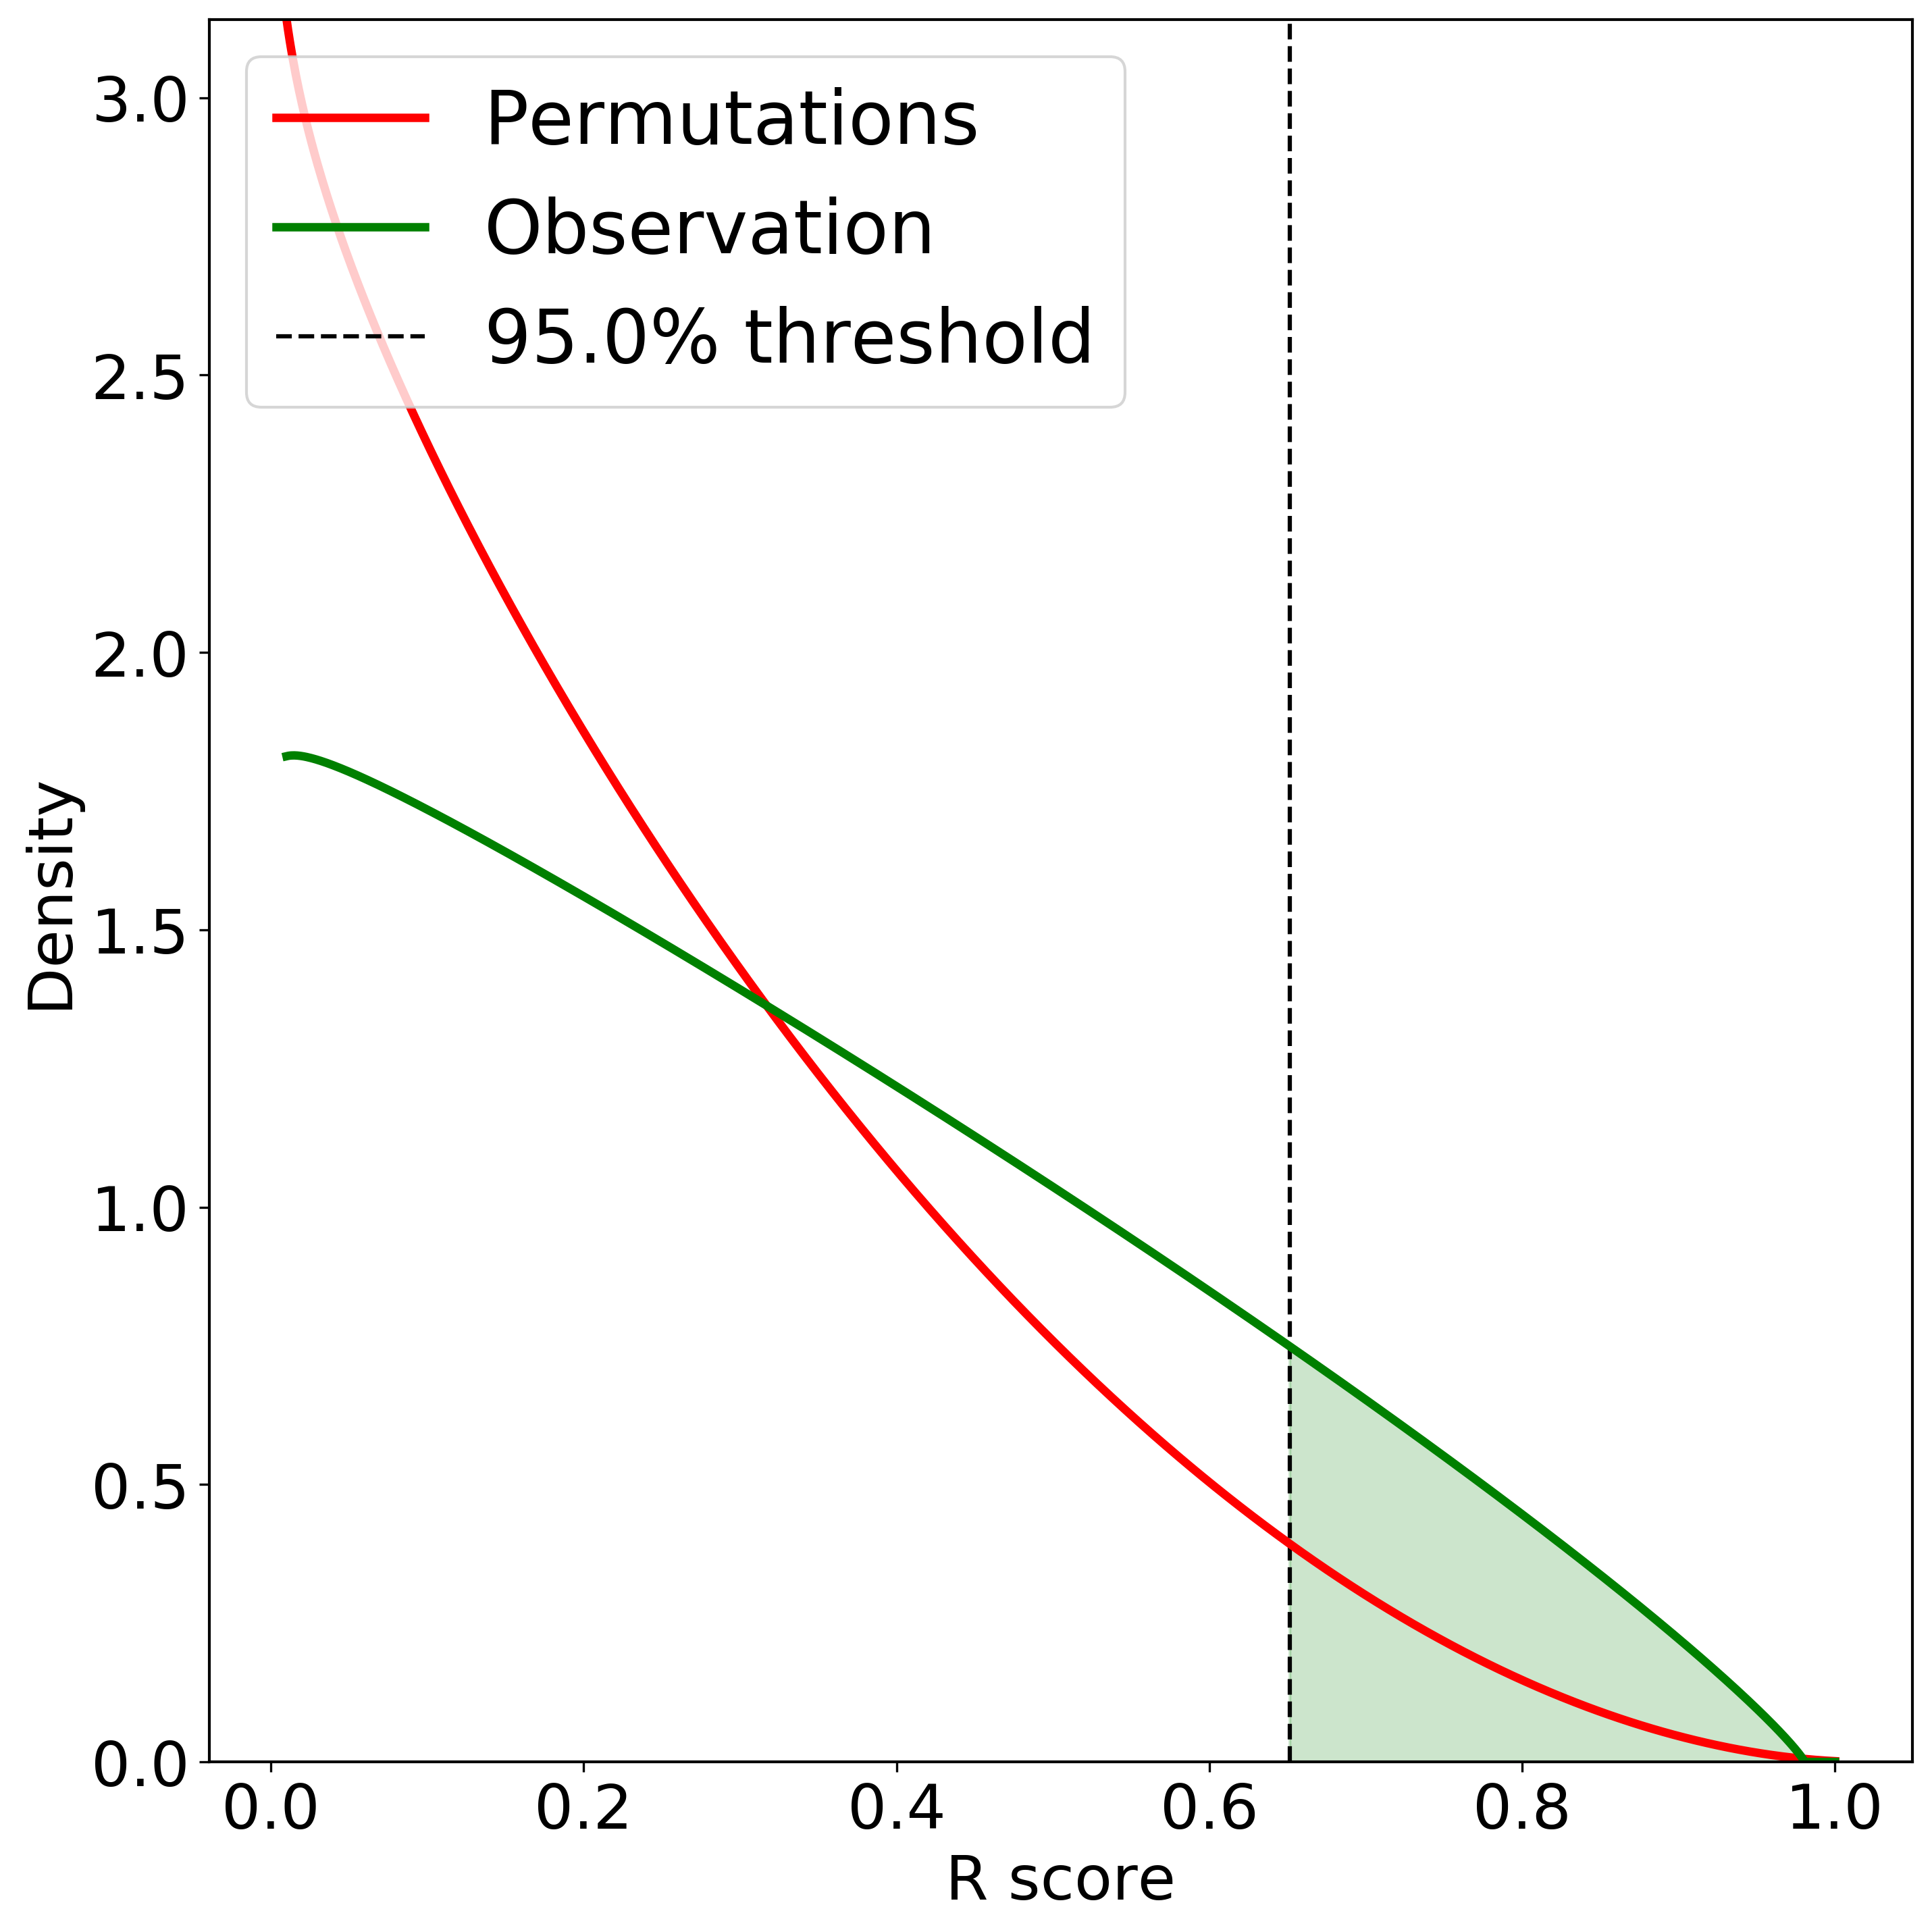

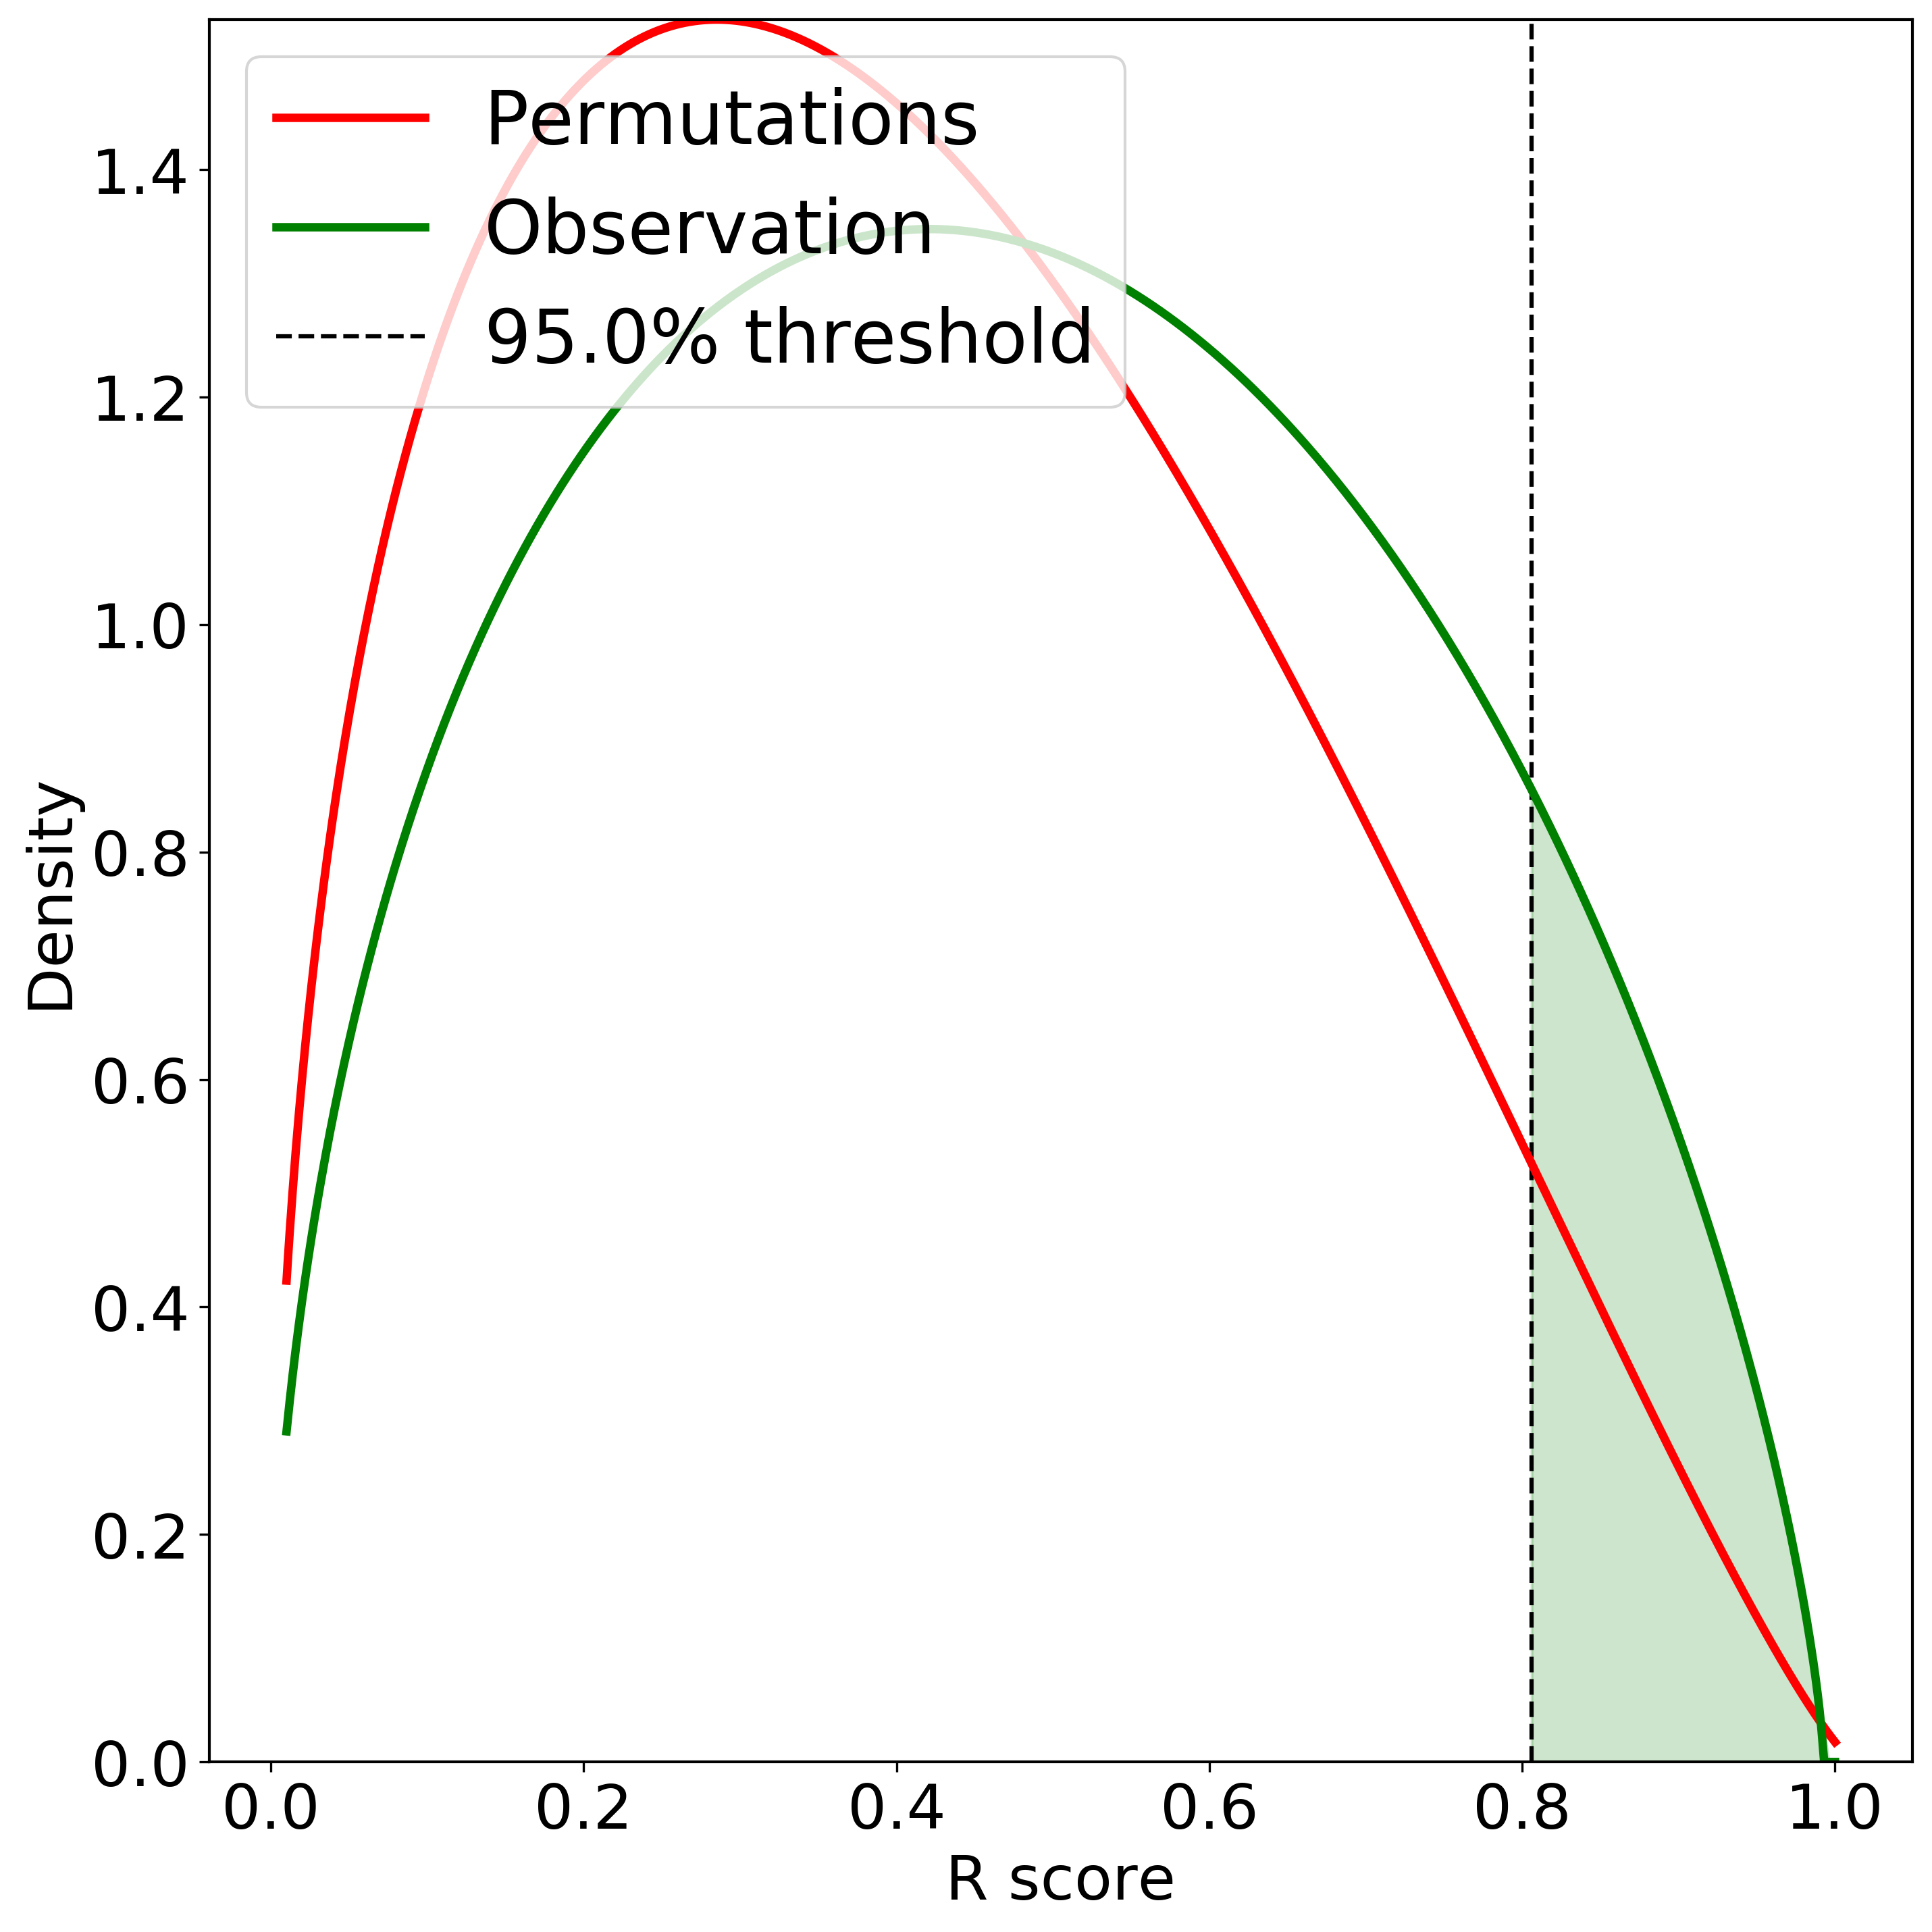

In [21]:
models_pvalue_table=pa.plot_gof(poly_obs_fit_scores, sig_obs_fit_scores, poly_perm_fit_scores, sig_perm_fit_scores, dist_obs=False, dist_perm=False)

In [22]:
models_pvalue_table

{'sigmoidal': [219797500.0, 5.643184632923222e-77, 0.7541467796469697],
 1: [255620500.0, 3.1673757315170927e-102, 0.42504650123789983],
 2: [246276900.0, 1.9252011264588114e-71, 0.65128892125506],
 3: [230675700.0, 1.5083541399377493e-32, 0.8060636854768528]}

# Cluster genes and plot groups

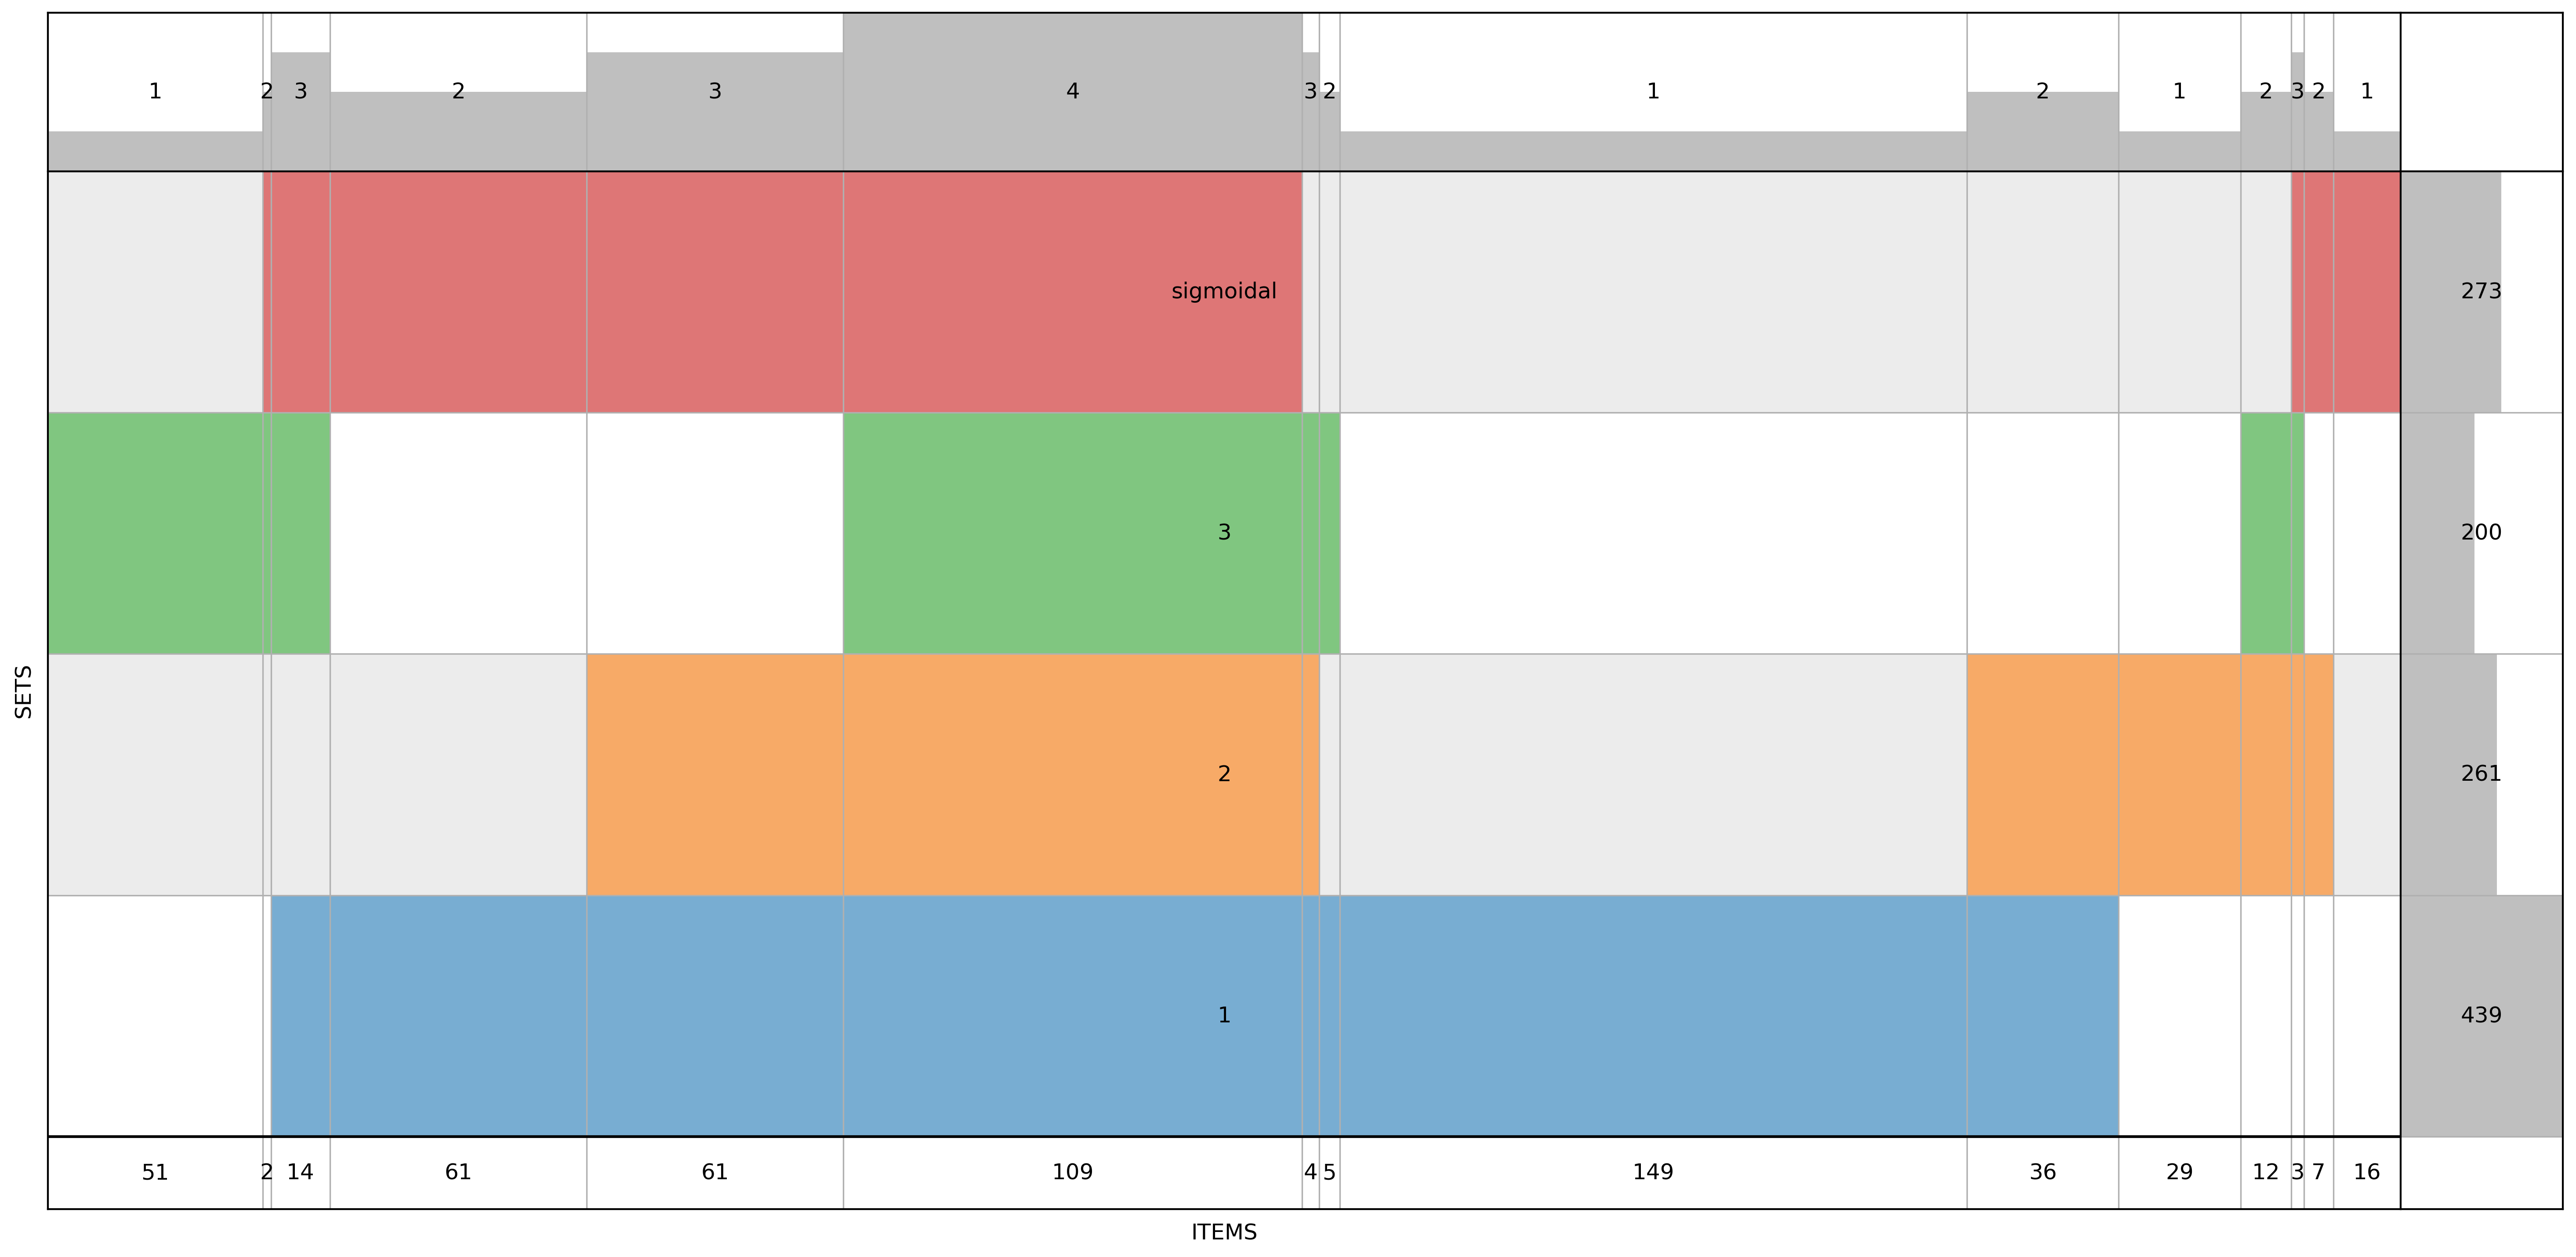

In [23]:
genes_clusters=pa.cluster_genes(models_scores)
pa.plot_clusters(genes_clusters)

# Generate summary table with scores og genes for each tested model

In [24]:
summary=pa.get_summary_table(genes_clusters, models_scores)
summary

,1,1_score,2,2_score,3,3_score,sigmoidal,sigmoidal_score
ENSG00000019991,True,0.449575,True,0.723615,False,0.000000,False,0.000000
ENSG00000079950,True,0.480134,False,0.000000,True,0.868608,False,0.000000
ENSG00000011052,True,0.533345,False,0.000000,False,0.000000,False,0.000000
ENSG00000030066,True,0.482364,False,0.000000,True,0.868826,False,0.000000
ENSG00000027697,True,0.519875,False,0.000000,False,0.000000,False,0.000000
...,...,...,...,...,...,...,...,...
ENSG00000030419,True,0.546074,False,0.000000,False,0.000000,False,0.000000
ENSG00000092964,True,0.581950,False,0.000000,False,0.000000,True,0.876615
ENSG00000064655,True,0.490366,False,0.000000,False,0.000000,False,0.000000
ENSG00000078114,False,0.000000,False,0.000000,False,0.000000,True,0.759071


# Assign each gene to the best fitting model

In [25]:
continuum_genes, sigmoid_genes, discarded_genes = pa.classify_genes(summary)

/home/ieo5417/.local/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Sigmoid and continuos score for gene ENSG00000048140 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000053328 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000011347 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000039139 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000067057 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000022277 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000013297 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000041802 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000074266 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000065534 are too close, gene will be discarded.
Sigmoid and continuos score for gene ENSG00000022976 are too close, gene will be

# Plot distribution of inflexion point for each gene

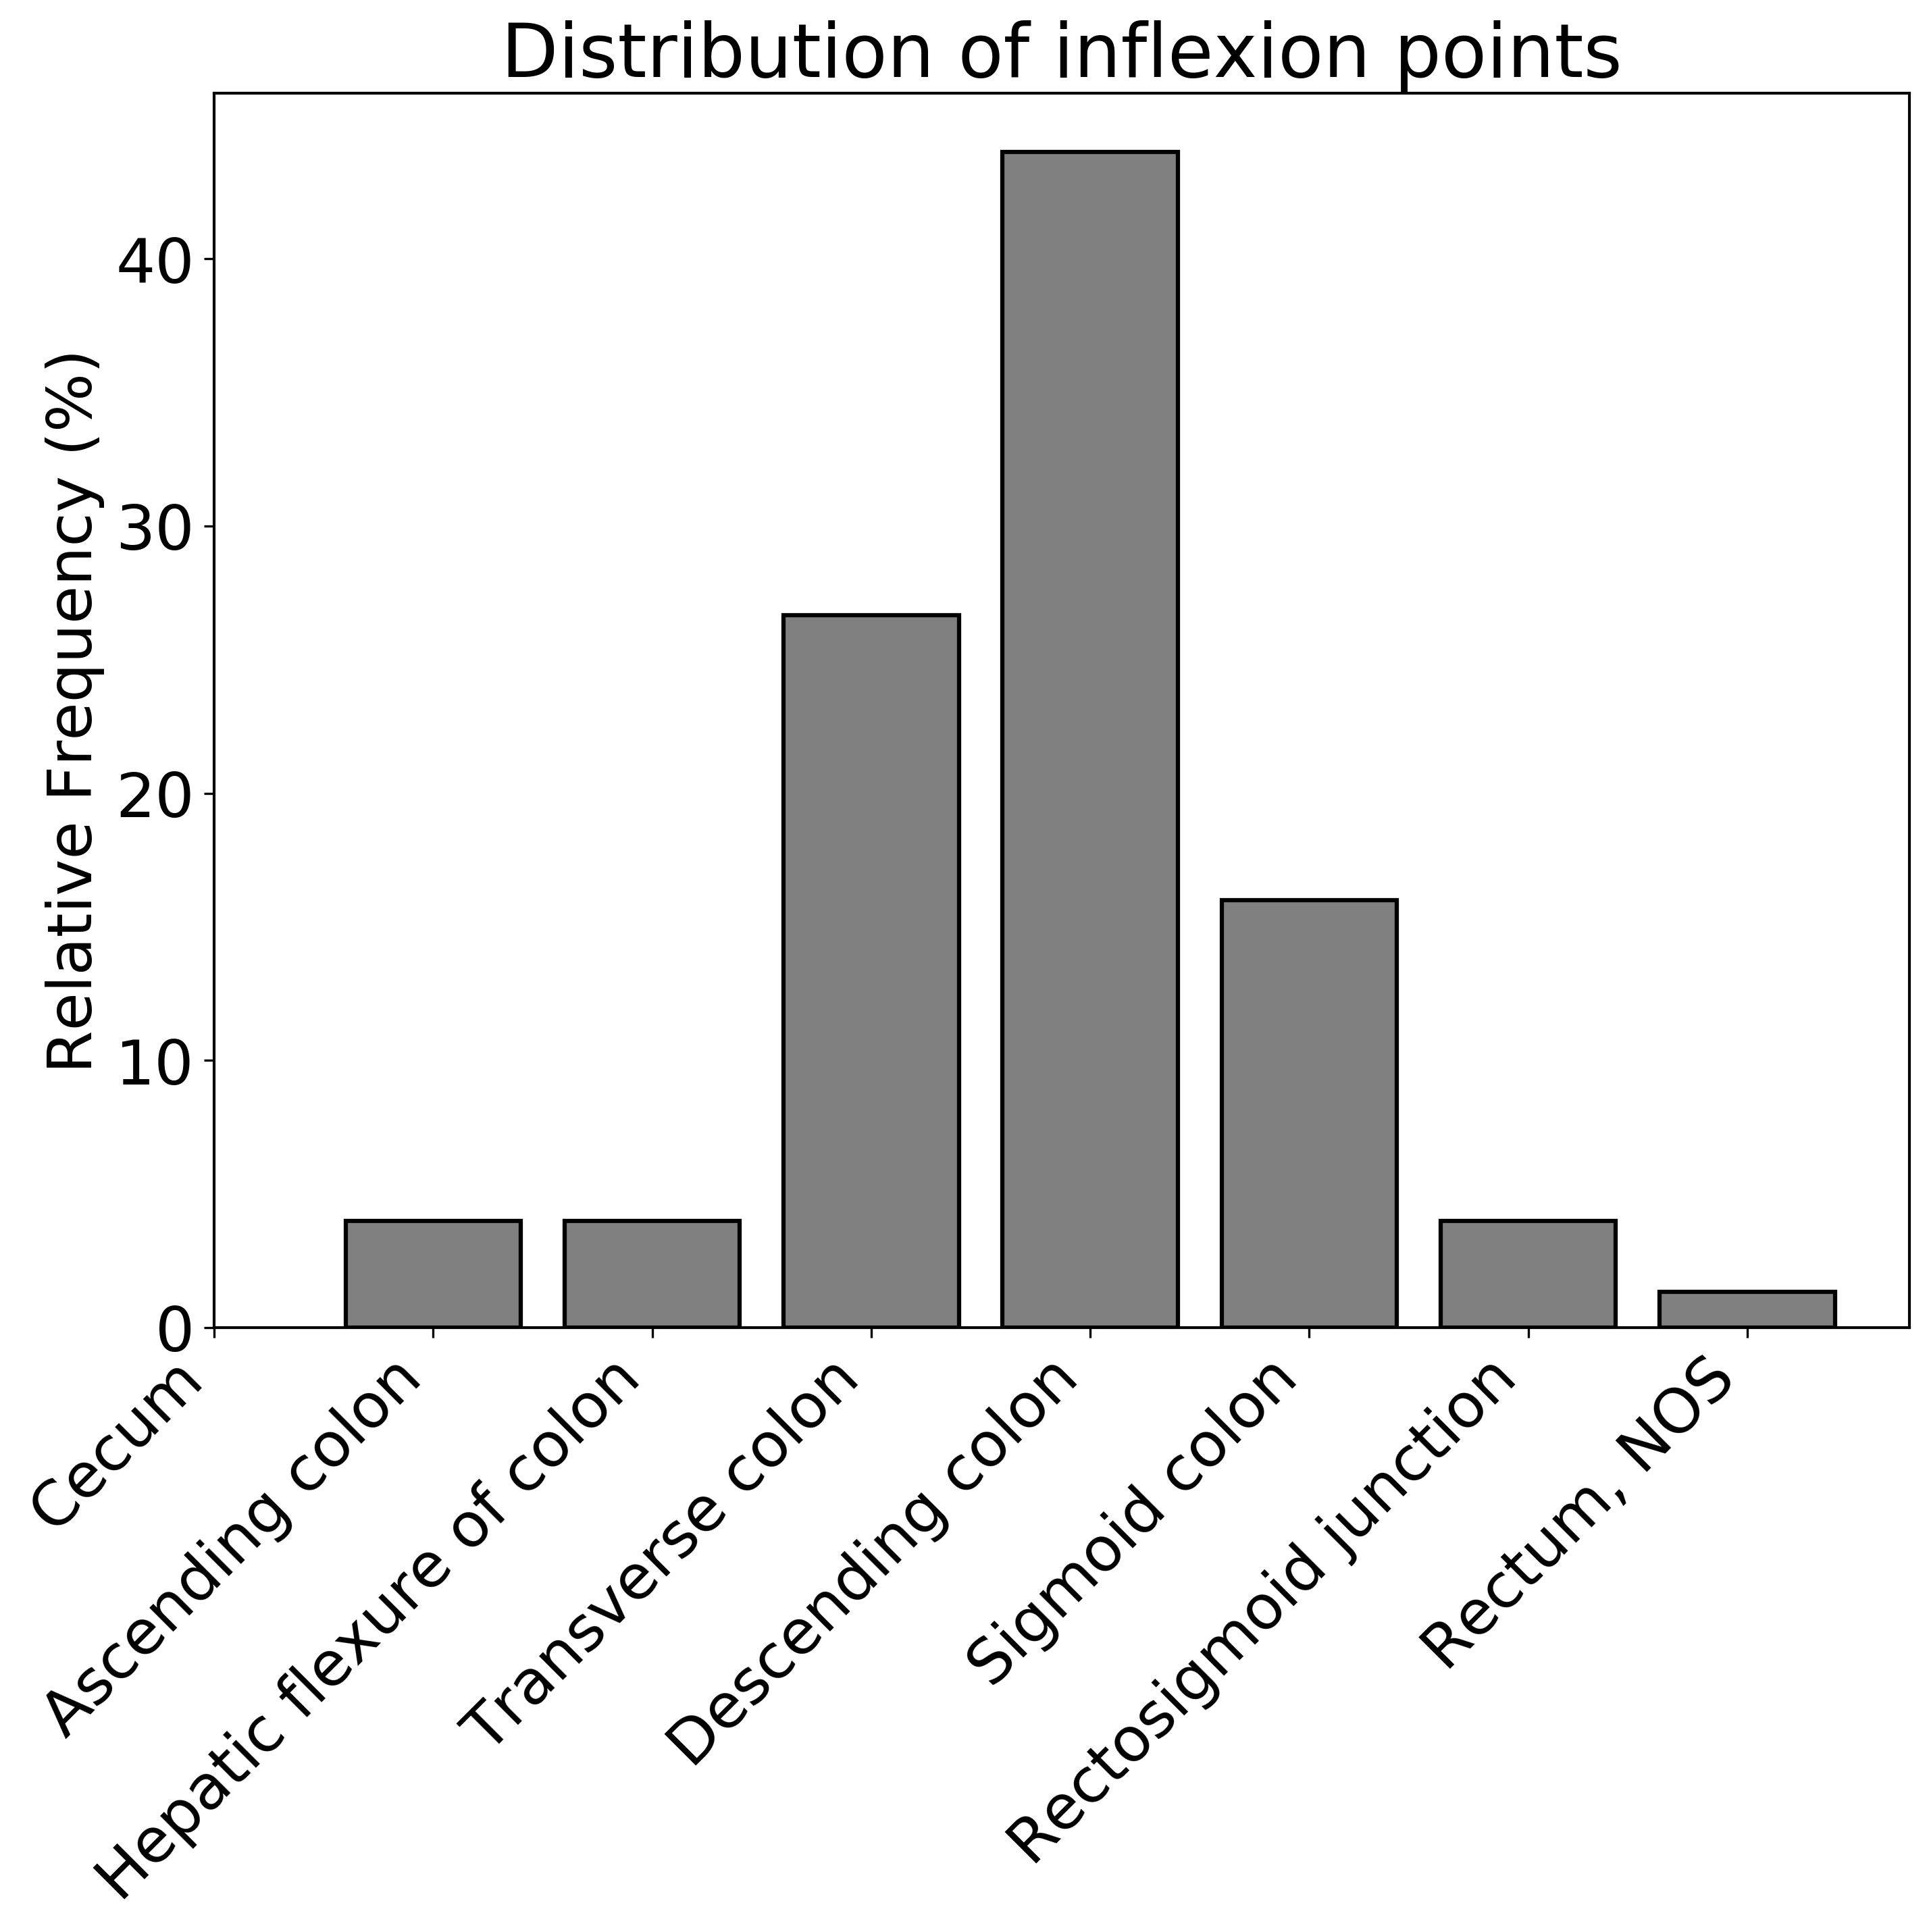

In [26]:
gene_list, section_l = pa.strict_sig_list(sigmoid_genes, sig_models, plot_dist = True)

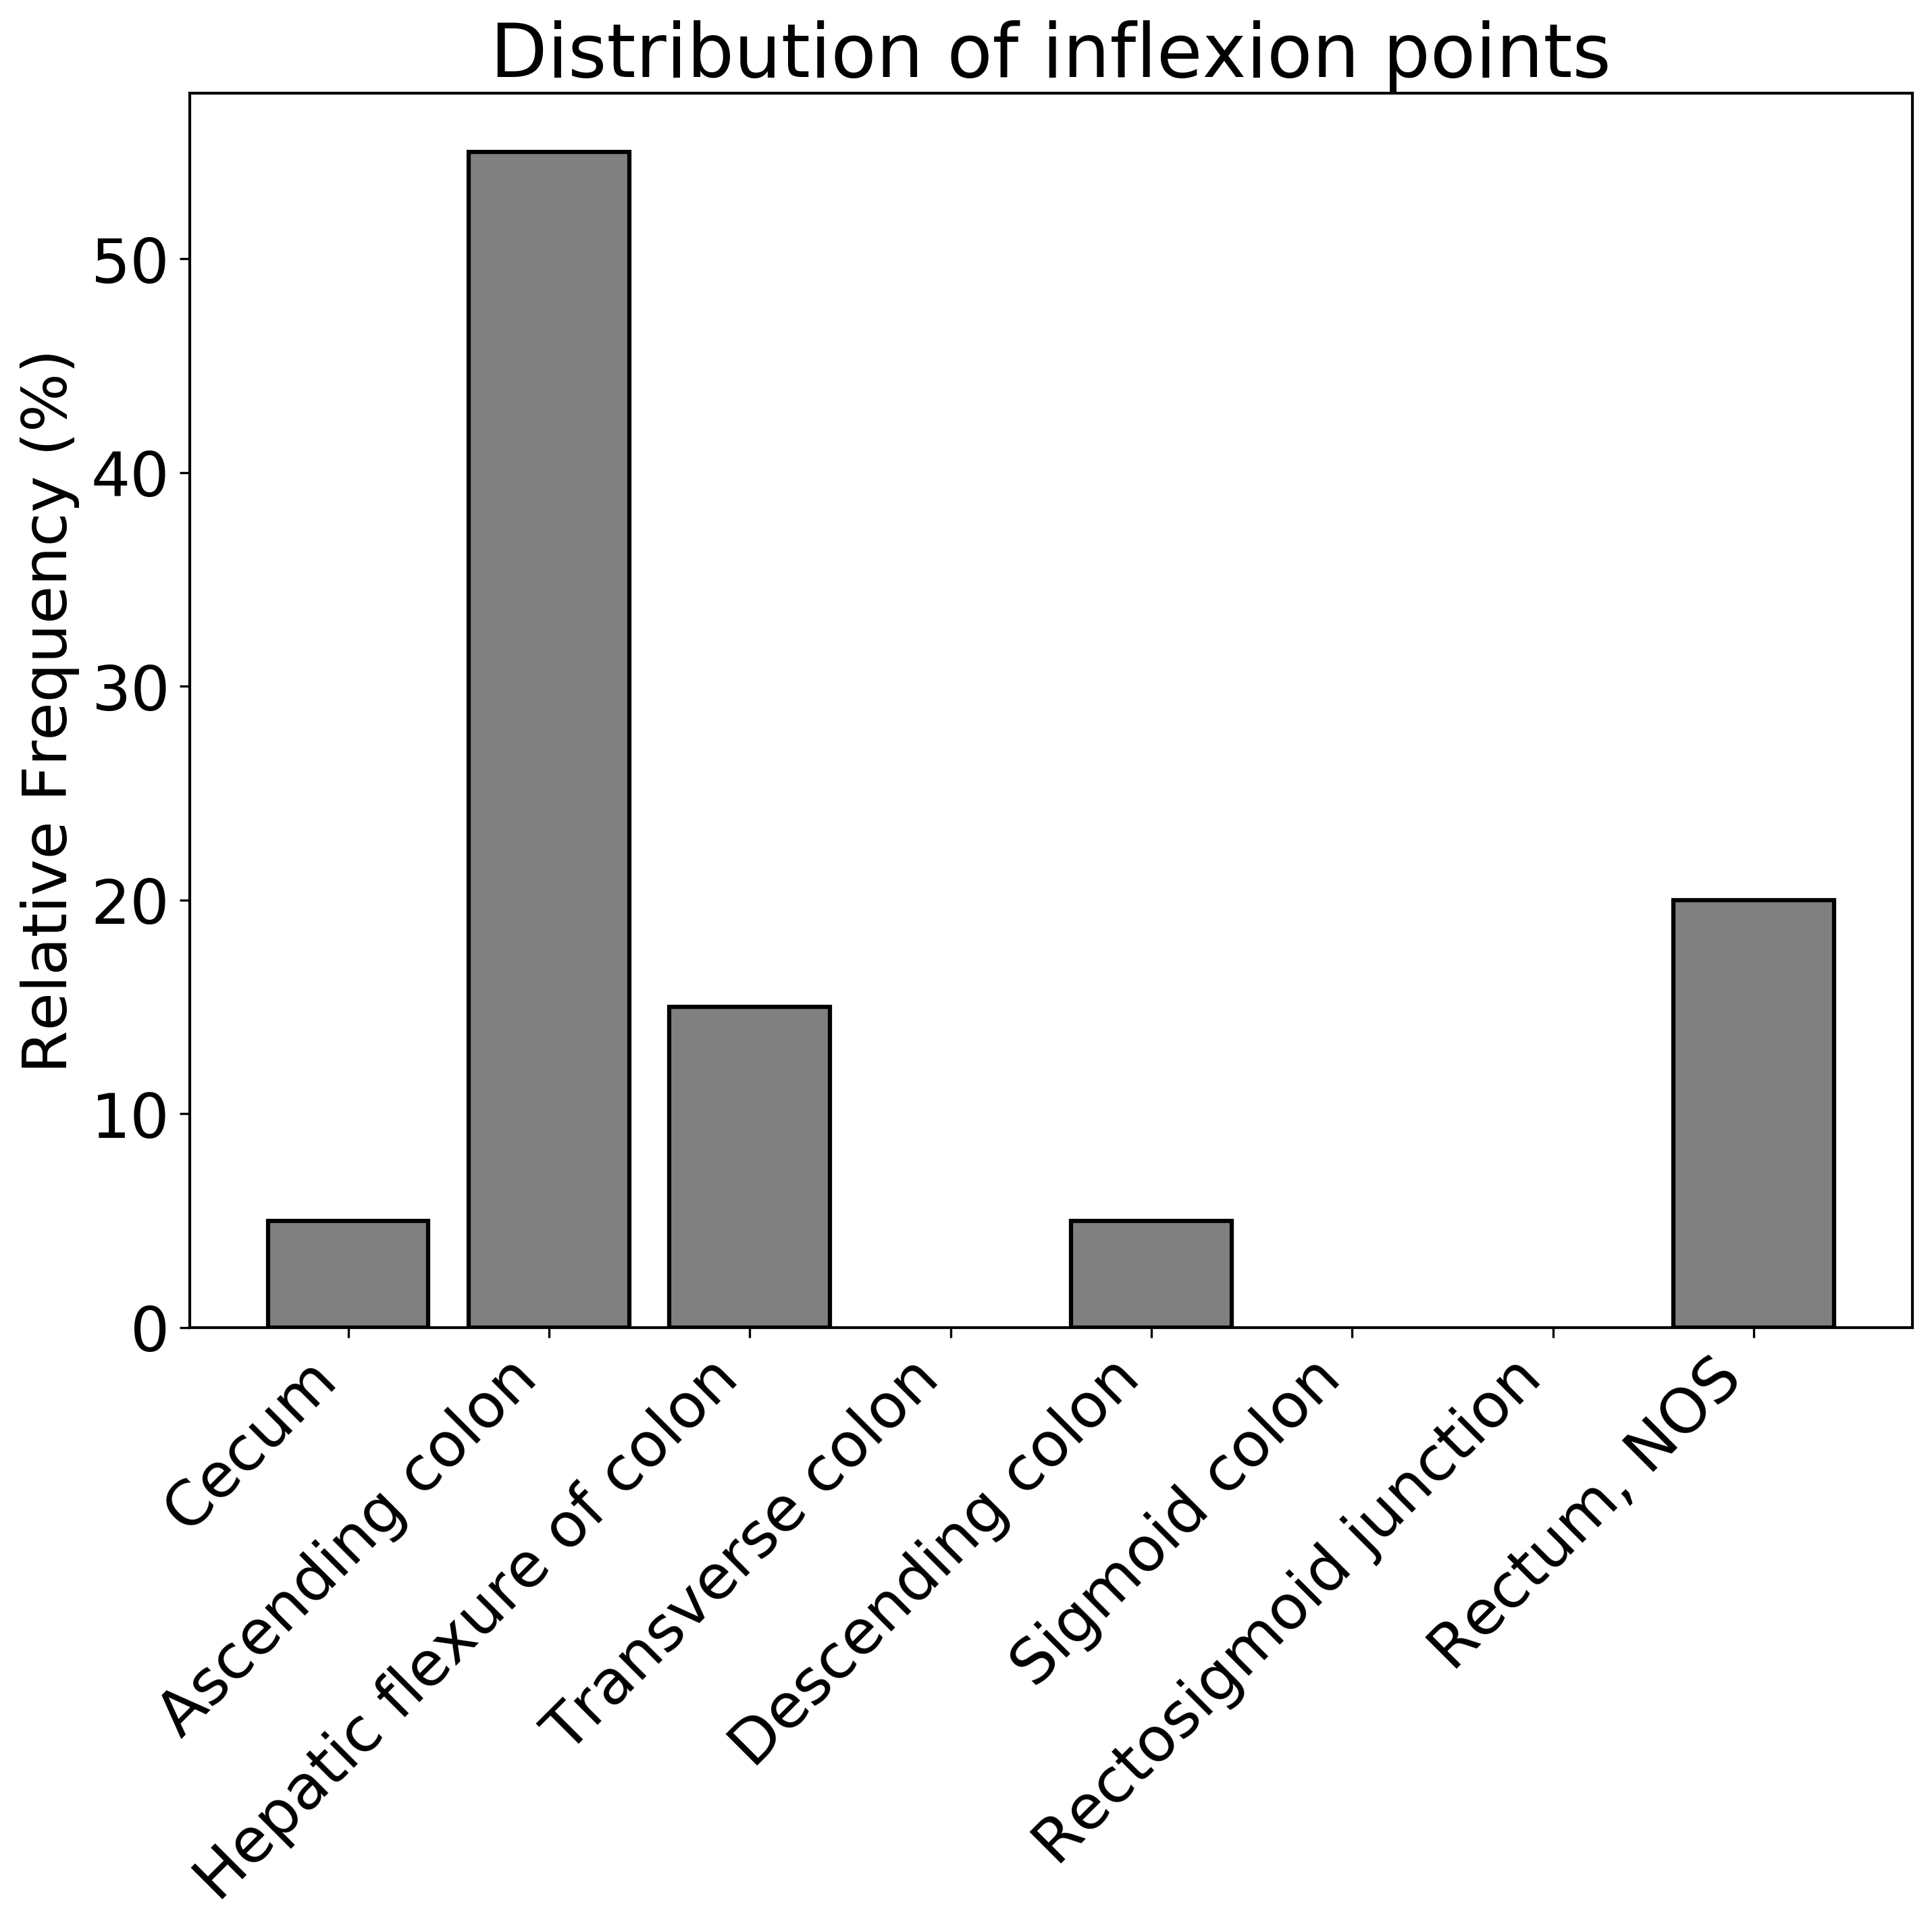

In [27]:
pa.strict_sig_list_random(medians, mad, sigmoid_genes, sig_models, plot_dist = True)